<a href="https://colab.research.google.com/github/Jordy-Rodrigues/Statsmodels-/blob/main/Regress%C3%A3o_Linear_com_Statsmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [222]:
# IMPORTAR AS BIBLIOTECAS NECESSÁRIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [240]:
# CARREGAR A BASE DE DADOS
# BASE DE DADOS COM NÚMEROS ALEATÓRIOS APENAS PARA MODO DE APRENDIZADO
dados = pd.read_excel('/content/drive/MyDrive/linear_statsmodels.xlsx')
dados.head()

,x,y
0,0.00000,-1.165614e+16
1,0.10101,-8.074456e+15
2,0.20202,-1.658825e+16
3,0.30303,-4.275013e+15
4,0.40404,-8.714275e+14


In [224]:
# DEFINIR O X E Y
x = dados ['x'].values
y = dados ['y'].values

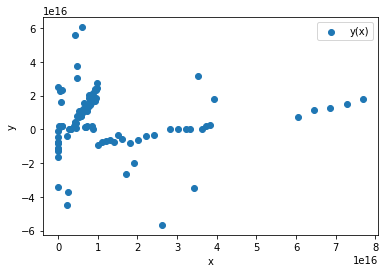

In [225]:
# CRIAR GRÁFICO DE DISPERSÃO 
plt.scatter(x, y,label='y(x)');
plt.xlabel('x');
plt.ylabel('y');
plt.legend();

In [226]:
# IMPORTAR A BIBLIOTECA DE ESTATÍSTICA STATSMODELS PARA O MODELO DE REGRESSÃO LINEAR
import statsmodels.api as sm

In [227]:
# UTILIZAR O MODELO DOS MÍNINOS QUADRADOS ORDINÁRIOS
# OBS: O Y VEM PRIMEIRO ENTRE PARENTESES
modelo = sm.OLS (y,x)

In [228]:
# TREINAR O MODELO
resultado = modelo.fit()

In [229]:
# MOSTRAR UM SUMÁRIO
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                      -0.049
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                      -inf
Date:                Tue, 26 Apr 2022   Prob (F-statistic):                nan
Time:                        01:45:14   Log-Likelihood:                -3884.3
No. Observations:                 100   AIC:                             7771.
Df Residuals:                      99   BIC:                             7773.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1581      0.087      1.814      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


CRIAR UM MODELO INTERCEPTO

In [230]:
# CRIAR UMA CONSTANTE
x = sm.add_constant(x)

In [231]:
# UTILIZAR NOVAMENTE O MODELO DOS MÍNINOS QUADRADOS ORDINÁRIOS
modelo2 = sm.OLS(y,x)

In [232]:
# TREINAR O MODELO
resultado2 = modelo2.fit()

In [233]:
# MOSTRAR UM SUMÁRIO 
print(resultado2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                      -0.049
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                      -inf
Date:                Tue, 26 Apr 2022   Prob (F-statistic):                nan
Time:                        01:45:14   Log-Likelihood:                -3884.3
No. Observations:                 100   AIC:                             7771.
Df Residuals:                      99   BIC:                             7773.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.718e-18    2.6e-18      1.814      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


In [234]:
# SALVAR O COEFICIÊNTE LINEAR E ANGULAR DENTRO DE UMA VARIÁVEL
coef_linear, coef_angular = resultado2.params

In [235]:
# CALCULAR A RETA
reta = coef_angular * x + coef_linear

In [236]:
# DEFINIR QUE VOU PEGAR OS DADOS DA SEGUNDA COLUNA
x = x[:,1]
reta = reta[:,1]

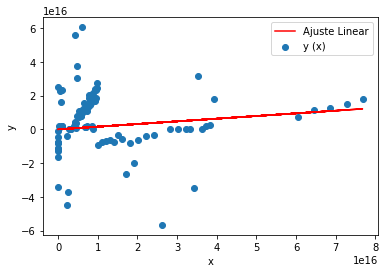

In [237]:
# MOSTRAR O RESULTADO NO GRÁFICO
plt.scatter(x, y,label='y (x)');
plt.plot(x, reta, label ='Ajuste Linear',color='red');
plt.xlabel('x');
plt.ylabel('y');
plt.legend();

In [238]:
# IMPORTAR O MODELO DE MACHINE LEARNING DE MÉTRICAS
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [239]:
# VER AS MÉTRICAS
variavel1 = mean_absolute_error(y,reta)
variavel2 = np.sqrt(mean_squared_error(y,reta))

print('variavel1 = {:0.2f}'.format(variavel1))
print('variavel2 = {:0.2f}'.format(variavel2))

variavel1 = 12803732647665246.00
variavel2 = 17910229485790656.00
